In [1]:
filename = "res/tags/all_spider.txt"
file = open(filename, "r")

tag_cnt = 14
params = []
for i, line in enumerate(file):
    arr = line.split()
    if (len(arr) == 0):
        continue
    params.append(arr[0])

file.close()

print(tag_cnt, len(params))
print(params)

14 14
['fft', 'probability', 'string', 'geometry', 'numeric', 'combinatorics', 'dp', 'sqrt-decomp', 'math', 'bitwise', 'flow', 'constructive', 'graph', 'data-structure']


In [2]:
filename = "res/out/pub_tag_got.txt"
file = open(filename, "r")

pub_ac = []
for i, line in enumerate(file):
    arr = line.split()
    if (len(arr) == 0):
        continue
    pub_ac.append(float(arr[0]))

file.close()

print(len(pub_ac))
print(pub_ac)

14
[13.3123, 9.18448, 7.31242, 6.71698, 23.6678, 17.7106, 11.3868, 8.63422, 8.73362, 8.30737, 1.51515, 34.5871, 19.2074, 14.7909]


In [3]:
filename = "res/out/pri_tag_got.txt"
file = open(filename, "r")

pri_ac = []
for i, line in enumerate(file):
    arr = line.split()
    if (len(arr) == 0):
        continue
    pri_ac.append(float(arr[0]))

file.close()

print(len(pri_ac))
print(pri_ac)

14
[10.5044, 8.8172, 9.79354, 6.66667, 18.0485, 16.2105, 13.8906, 14.0481, 8.94287, 6.53974, 3.33333, 26.2165, 16.4604, 12.6674]


In [4]:
assert(tag_cnt == len(params))
assert(tag_cnt == len(pub_ac))
assert(tag_cnt == len(pri_ac))
print(params)

['fft', 'probability', 'string', 'geometry', 'numeric', 'combinatorics', 'dp', 'sqrt-decomp', 'math', 'bitwise', 'flow', 'constructive', 'graph', 'data-structure']


In [5]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

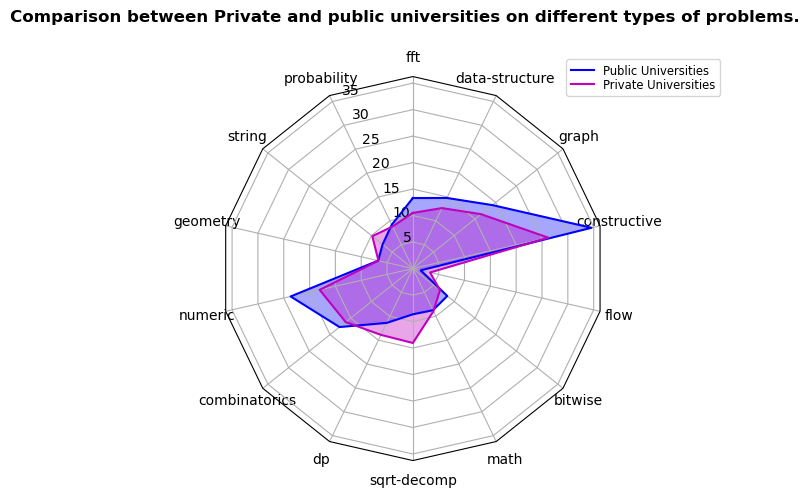

In [6]:
theta = radar_factory(tag_cnt, frame='polygon')
data = [pub_ac, pri_ac]

fig, ax = plt.subplots(subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

# colors = ['b', 'r', 'g', 'm', 'y']
colors = ['b', 'm']

ax.set_title("")
for d, color in zip(data, colors):
    ax.plot(theta, d, color=color)
    ax.fill(theta, d, facecolor=color, alpha=0.35, label='_nolegend_')
ax.set_varlabels(params)

# add legend relative to top-left plot
labels = ('Public Universities', 'Private Universities')
legend = ax.legend(labels, loc=(0.9, .95),labelspacing=0.1, fontsize='small')

fig.text(0.5, 0.965, 'Comparison between Private and public universities on different types of problems.',
         horizontalalignment='center', color='black', weight='bold',
         size='large')

plt.show()